In [176]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = "png"
pio.defaults.default_scale = 2
pio.defaults.default_width = 1000
pio.defaults.default_height = 600
test_csv = pd.read_csv('data/test.csv')
train_csv = pd.read_csv('data/train.csv')
print(test_csv.head())
print(train_csv.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [177]:
train_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [178]:
na_percent = train_csv.isna().mean() * 100
na_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [179]:
top10 = na_percent.sort_values(ascending=False)[:10]
top10

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
dtype: float64

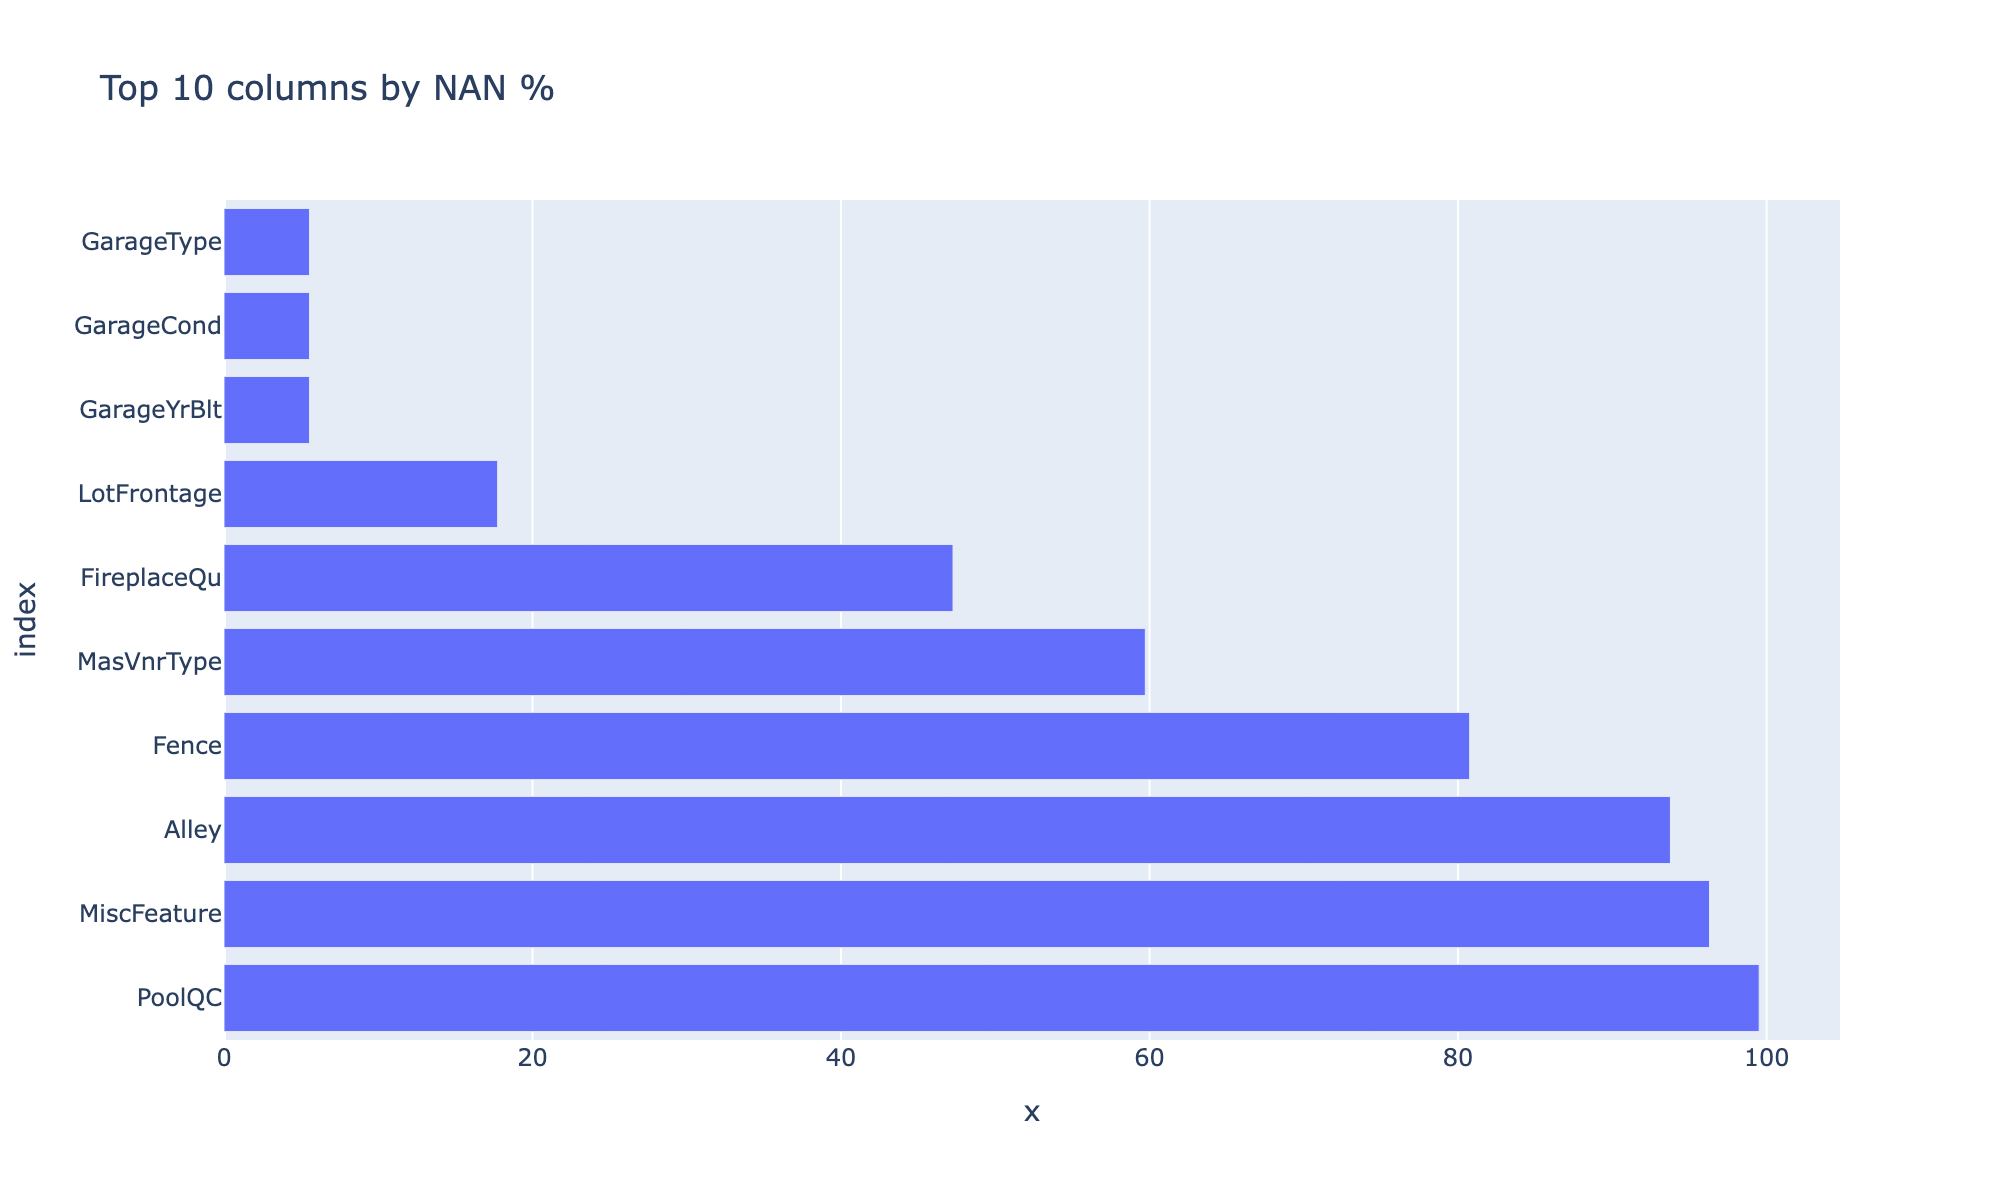

In [180]:
import plotly.express as px
fig = px.bar(top10, x=top10.values, y=top10.index, orientation='h',
             title='Top 10 columns by NAN %')
fig.show()

In [181]:
na_cols = ['Alley', 'MiscFeature', 'PoolQC']
train_csv[na_cols] = train_csv[na_cols].fillna('None')
test_csv[na_cols] = test_csv[na_cols].fillna('None')
(train_csv.isna().mean() * 100).sort_values(ascending=False)[:18]

Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
Functional       0.000000
BsmtFullBath     0.000000
dtype: float64

In [182]:
target_candidates = set(train_csv.columns) - set(test_csv.columns)
print(target_candidates)

{'SalePrice'}


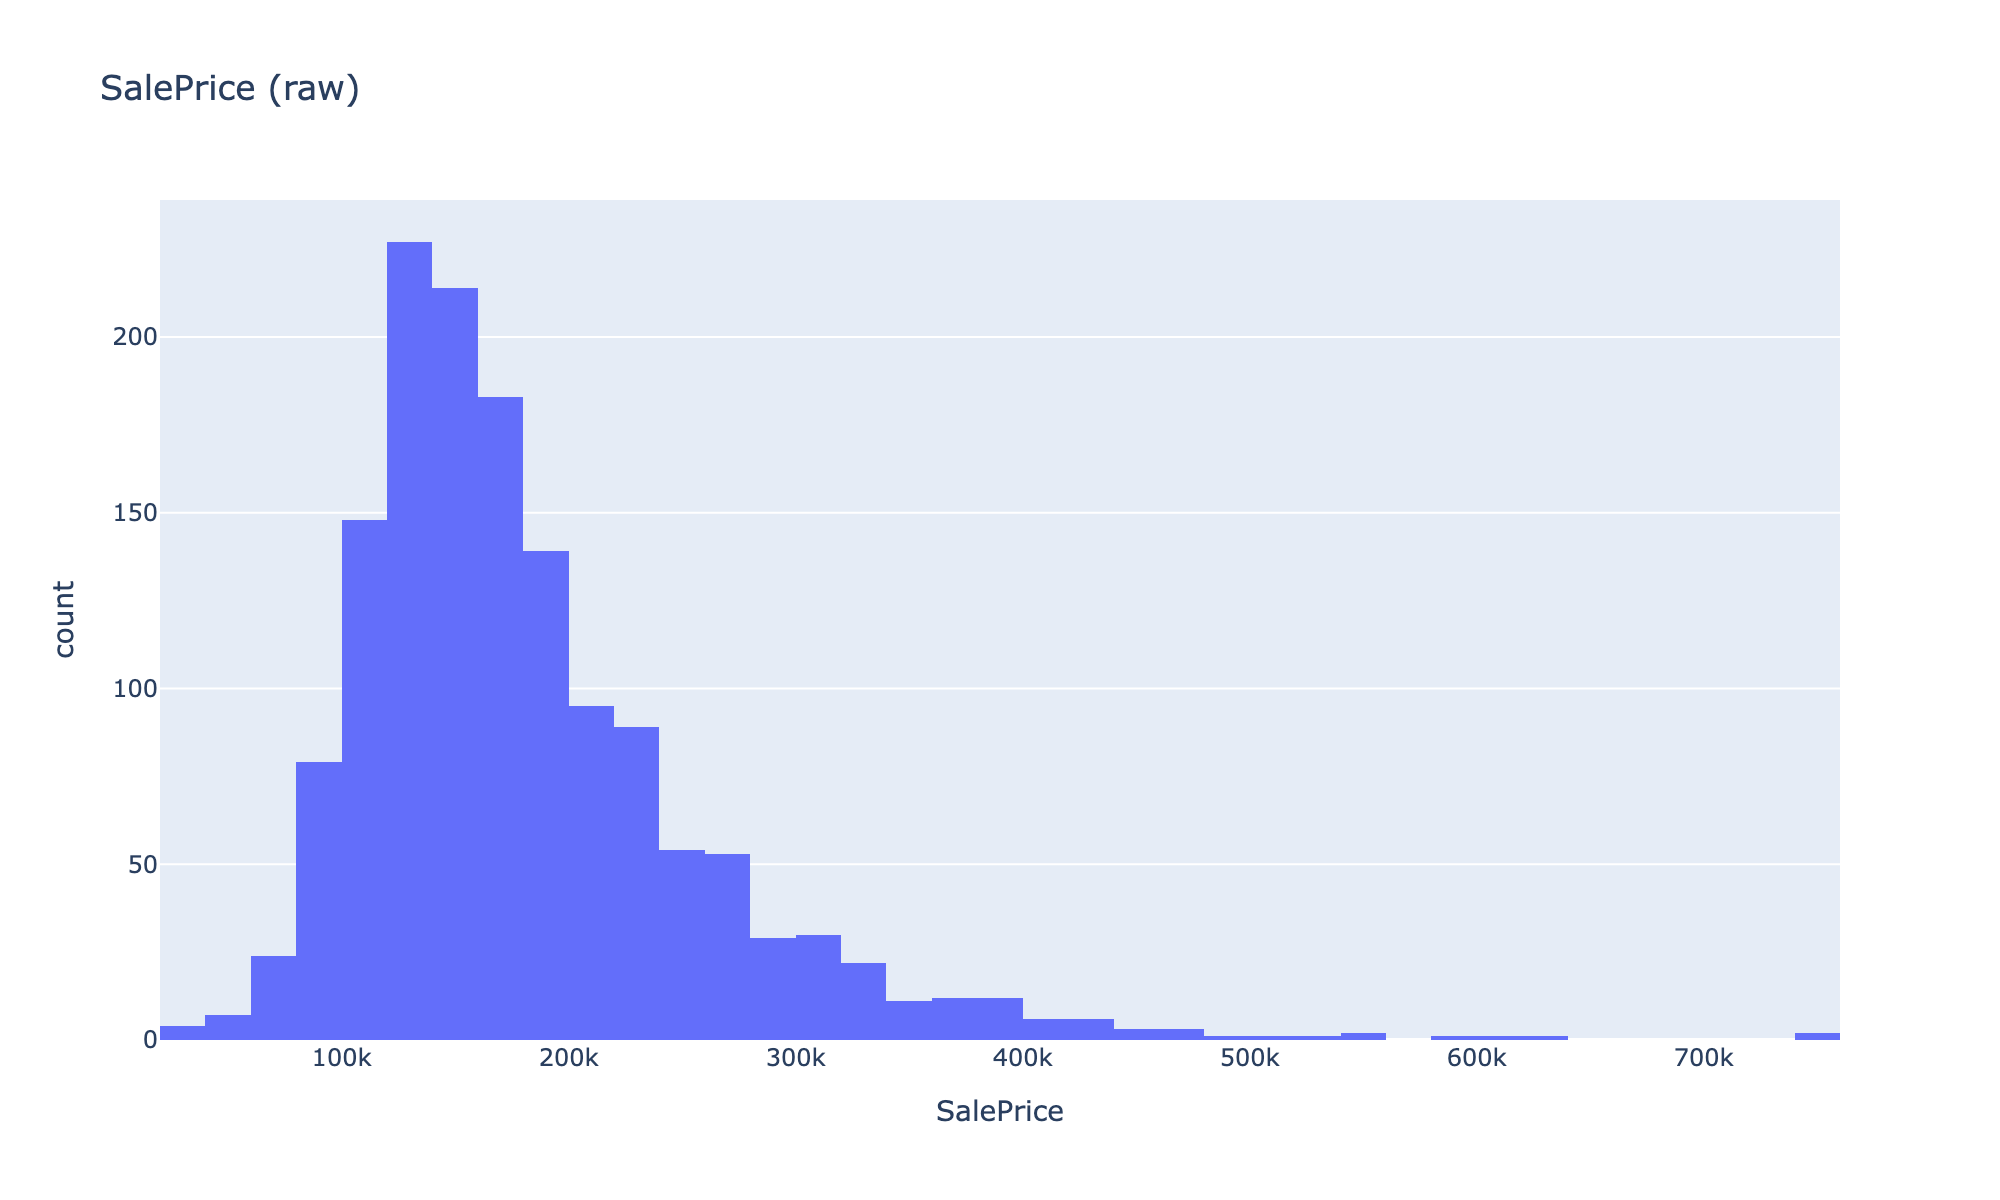

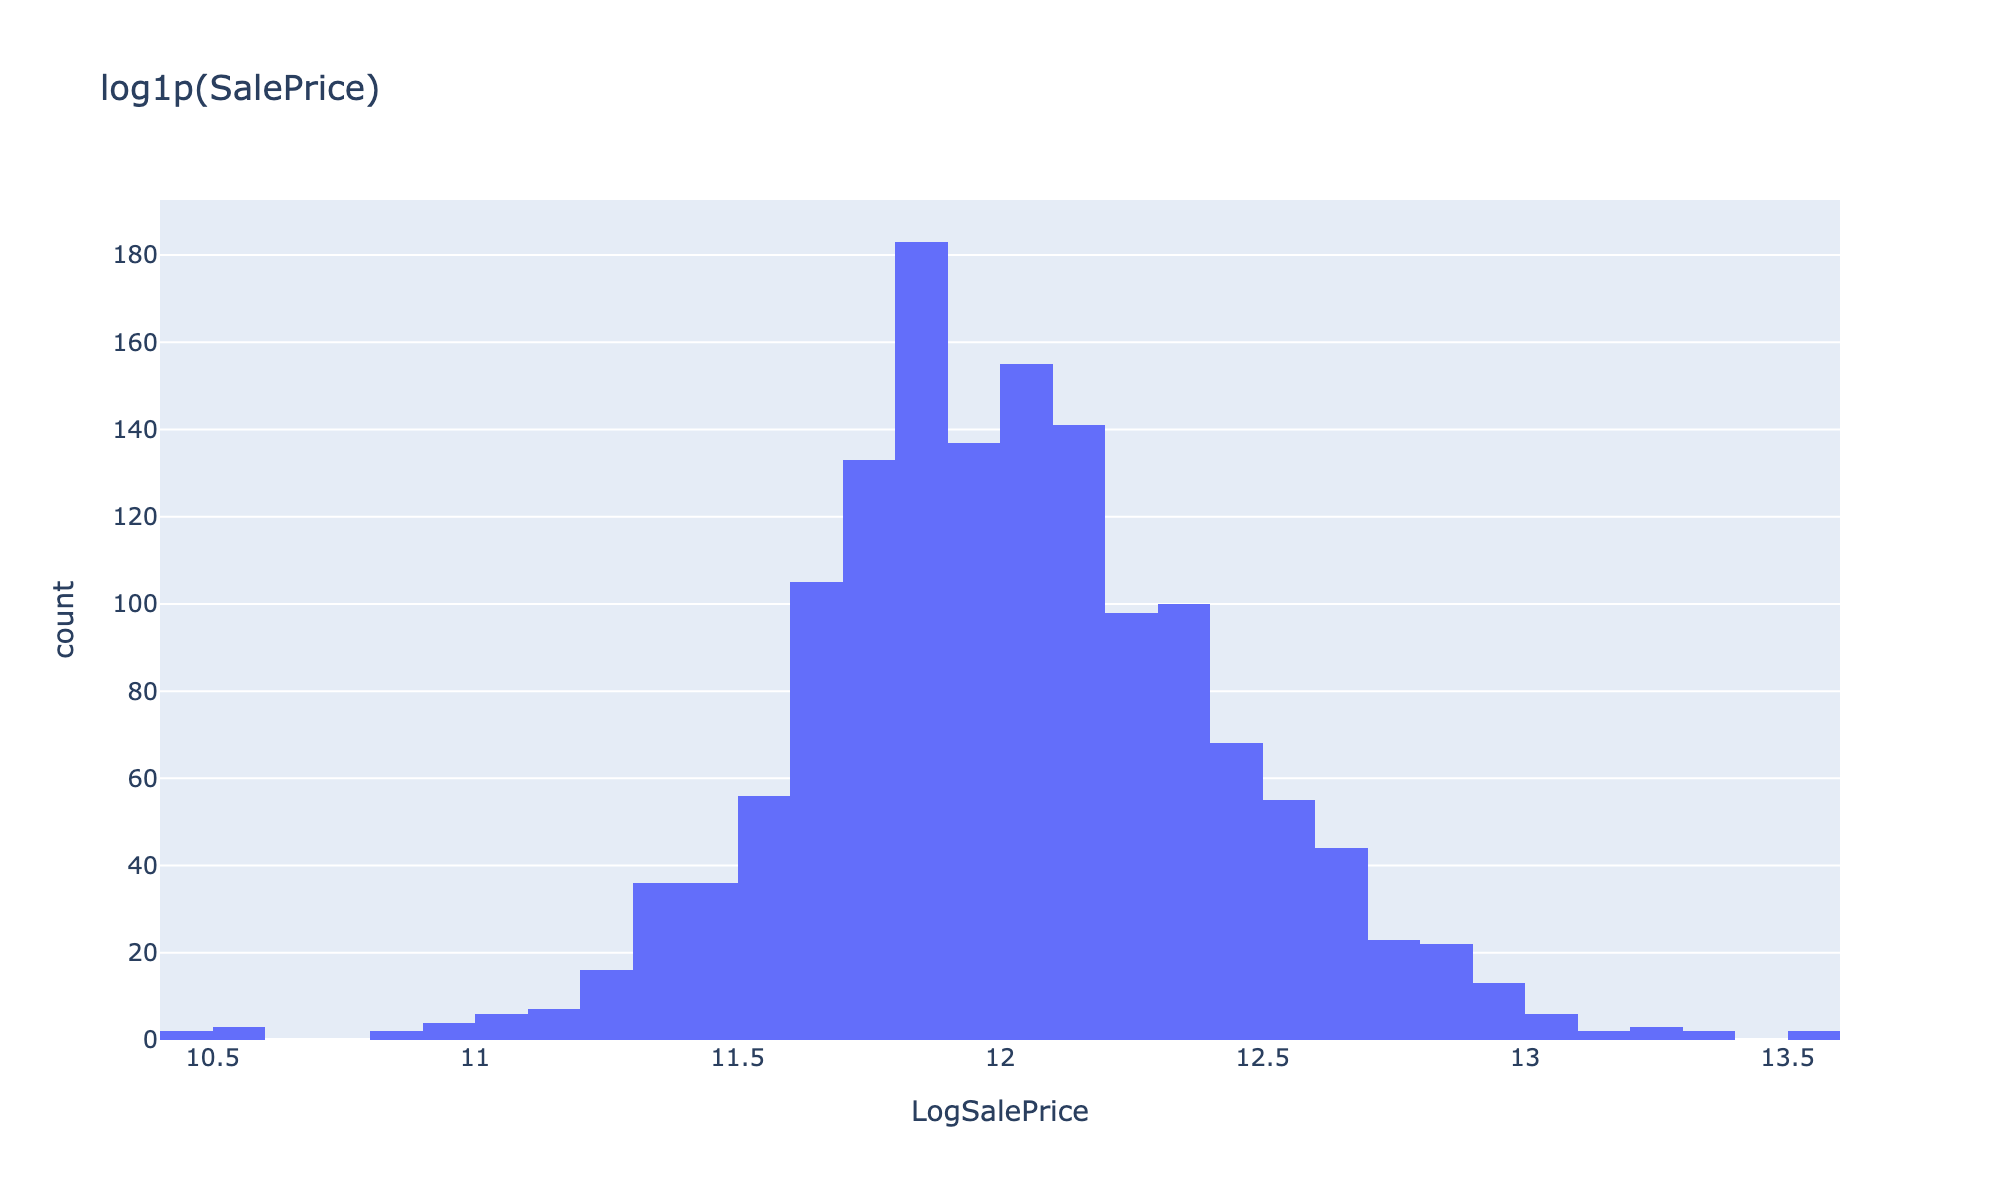

In [183]:
import pandas as pd
import numpy as np
import plotly.express as px

fig_raw = px.histogram(
    train_csv,
    x="SalePrice",
    nbins=40,
    title="SalePrice (raw)"
)
fig_raw.show()

train_csv["LogSalePrice"] = np.log1p(train_csv["SalePrice"])

fig_log = px.histogram(
    train_csv,
    x="LogSalePrice",
    nbins=40,
    title="log1p(SalePrice)"
)
fig_log.show()

In [184]:
num_cols  = train_csv.select_dtypes(include=['int64', 'float64']).columns
cat_cols  = train_csv.select_dtypes(include=['object']).columns
print(len(num_cols), len(cat_cols))

39 43


In [185]:
for col in num_cols:
    train_csv[col] = (
        train_csv
            .groupby('Neighborhood')[col]
            .transform(lambda s: s.fillna(s.median()))
    )

print(train_csv[num_cols].isna().sum().sort_values(ascending=False).head())

Id              0
OpenPorchSF     0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
dtype: int64


In [186]:
na_cat = train_csv[cat_cols].isna().mean() * 100
top10_cat = na_cat.sort_values(ascending=False)[:10]
top10_cat

Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
dtype: float64

In [187]:
none_cols = ['Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'PoolQC', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

train_csv[none_cols] = train_csv[none_cols].fillna('None')
test_csv[none_cols]  = test_csv[none_cols].fillna('None')

for col in cat_cols:
    if col not in none_cols:
        mode = train_csv[col].mode()[0]
        train_csv[col] = train_csv[col].fillna(mode)
        test_csv[col]  = test_csv[col].fillna(mode)
        
print(train_csv[cat_cols].isna().sum().max())


0


In [188]:
cat_card = train_csv[cat_cols].nunique().sort_values(ascending=False)
print(cat_card.head(10))

Neighborhood    25
Exterior2nd     16
Exterior1st     15
SaleType         9
Condition1       9
RoofMatl         8
Condition2       8
HouseStyle       8
BsmtFinType2     7
Functional       7
dtype: int64


In [189]:
all_hood = pd.concat([train_csv['Neighborhood'], test_csv['Neighborhood']])

hood2idx = {cat: idx for idx, cat in enumerate(all_hood.unique())}

train_csv['Neighborhood_idx'] = train_csv['Neighborhood'].map(hood2idx)
test_csv['Neighborhood_idx'] = test_csv['Neighborhood'].map(hood2idx)
print(train_csv['Neighborhood_idx'].unique()[:10])
print(len(train_csv['Neighborhood_idx'].unique()))

[0 1 2 3 4 5 6 7 8 9]
25


In [190]:
from sklearn.preprocessing import StandardScaler

drop_cols = {'SalePrice', 'LogSalePrice', 'Neighborhood_idx', 'Id'}
num_cols = [c for c in train_csv.select_dtypes(include=['int64','float64']).columns
            if c not in drop_cols]


skaler = StandardScaler()
skaler.fit(train_csv[num_cols])

X_train_num = skaler.transform(train_csv[num_cols])
X_test_num = skaler.transform(test_csv[num_cols])
X_train_num.shape

(1460, 36)

In [191]:
oh_cat = [col for col in cat_cols if col != 'Neighborhood']

full_csv = pd.concat([train_csv[oh_cat], test_csv[oh_cat]], axis=0)
full_csv_dummies = pd.get_dummies(full_csv, drop_first=False)

X_train_cat = full_csv_dummies.iloc[:len(train_csv)].values
X_test_cat  = full_csv_dummies.iloc[len(train_csv):].values

print(X_train_cat.shape, X_test_cat.shape)

(1460, 241) (1459, 241)


In [192]:
import numpy as np

hood_train = train_csv['Neighborhood_idx'].values.reshape(-1, 1)

X_train_main = np.hstack([X_train_num, X_train_cat])
X_train_main

array([[ 0.07337496, -0.23187687, -0.20714171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.43704276, -0.09188637, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.09809294,  0.07347998, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.18728222, -0.14781027, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09809294, -0.08016039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.21406955, -0.05811155, ...,  0.        ,
         1.        ,  0.        ]])

In [193]:
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from keras.models import Model
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

main_in = Input(shape=(X_train_main.shape[1],), name='main')
hood_in = Input(shape=(1,), name='hood')
hood_emb = Embedding(input_dim=25, output_dim=8)(hood_in)
hood_vec = Flatten()(hood_emb)

x = Concatenate()([main_in, hood_vec])
x = Dense(128, activation='relu')(x)

x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
out = Dense(1)(x)

model = Model([main_in, hood_in], out)
model.compile(optimizer=Adam(3e-4),
              loss='mse',
              metrics=[RootMeanSquaredError()])

In [194]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

X_tr_main, X_val_main, X_tr_hood, X_val_hood, y_tr, y_val = train_test_split(
    X_train_main, hood_train, train_csv['LogSalePrice'].values,
    test_size=0.2, random_state=42
)

es = EarlyStopping(
    patience=20,
    restore_best_weights=True
)
print(y_tr[:5])
print(X_train_main.shape[0] == len(train_csv) == hood_train.shape[0])
print(y_tr.min(), y_tr.max())


[11.88449592 12.08954445 11.3504183  12.07254697 11.75195024]
True
10.460270761075149 13.521140839642674


In [195]:
history = model.fit(
    {'main': X_tr_main, 'hood': X_tr_hood}, y_tr,
    validation_data=({'main': X_val_main, 'hood': X_val_hood}, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/300
37/37 - 0s - 10ms/step - loss: 131.8680 - root_mean_squared_error: 11.4834 - val_loss: 91.3960 - val_root_mean_squared_error: 9.5601
Epoch 2/300
37/37 - 0s - 1ms/step - loss: 53.0813 - root_mean_squared_error: 7.2857 - val_loss: 12.0614 - val_root_mean_squared_error: 3.4730
Epoch 3/300
37/37 - 0s - 1ms/step - loss: 3.4620 - root_mean_squared_error: 1.8606 - val_loss: 0.6795 - val_root_mean_squared_error: 0.8243
Epoch 4/300
37/37 - 0s - 1ms/step - loss: 1.3138 - root_mean_squared_error: 1.1462 - val_loss: 0.3240 - val_root_mean_squared_error: 0.5692
Epoch 5/300
37/37 - 0s - 1ms/step - loss: 1.0882 - root_mean_squared_error: 1.0432 - val_loss: 0.2552 - val_root_mean_squared_error: 0.5051
Epoch 6/300
37/37 - 0s - 1ms/step - loss: 1.0484 - root_mean_squared_error: 1.0239 - val_loss: 0.2067 - val_root_mean_squared_error: 0.4547
Epoch 7/300
37/37 - 0s - 1ms/step - loss: 0.9411 - root_mean_squared_error: 0.9701 - val_loss: 0.1793 - val_root_mean_squared_error: 0.4235
Epoch 8/300
3

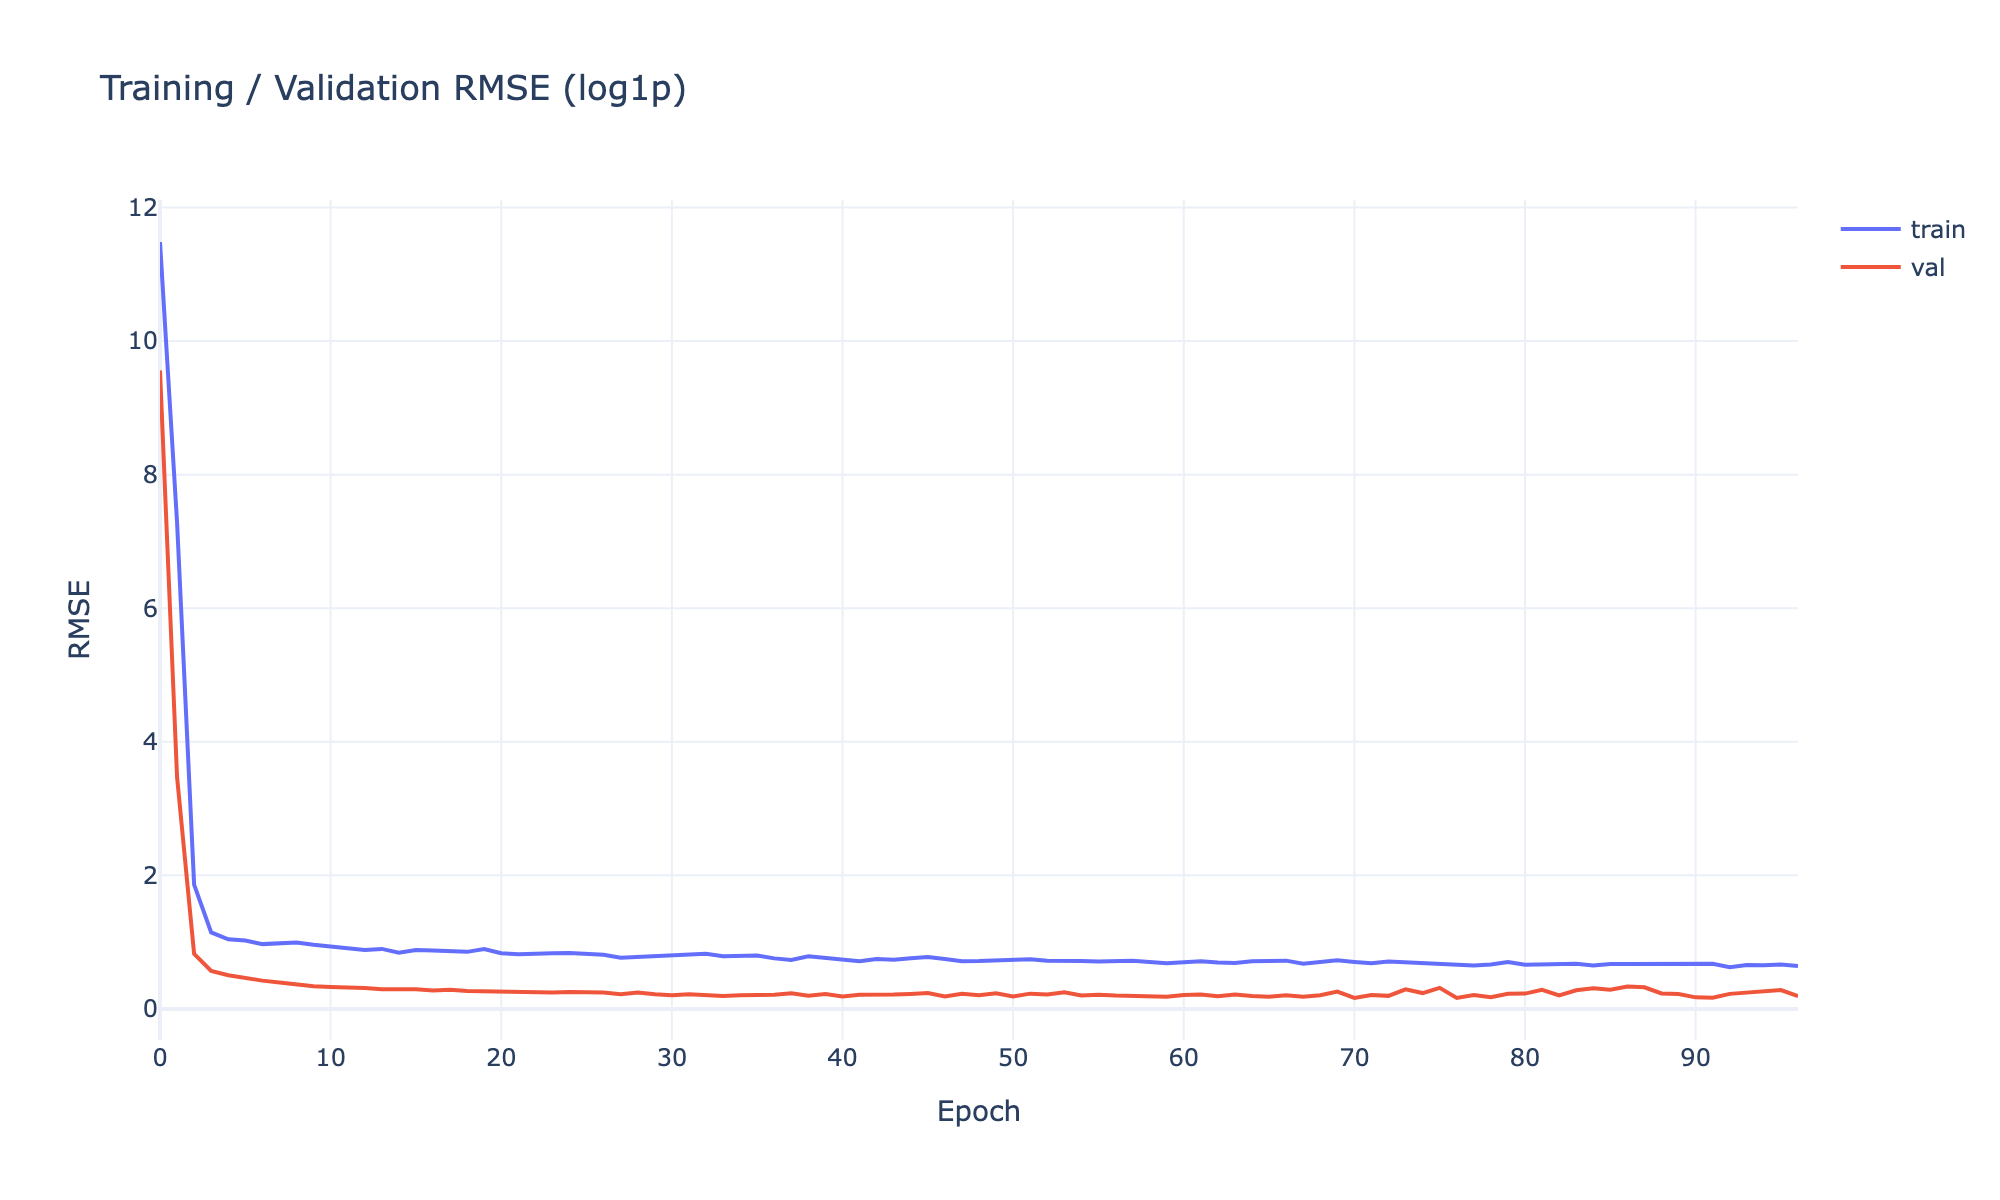

In [196]:
import plotly.graph_objects as go

epochs = list(range(len(history.history['root_mean_squared_error'])))

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=epochs,
    y=history.history['root_mean_squared_error'],
    mode='lines',
    name='train'
))
fig.add_trace(go.Scatter(
    x=epochs,
    y=history.history['val_root_mean_squared_error'],
    mode='lines',
    name='val'
))

fig.update_layout(
    title='Training / Validation RMSE (log1p)',
    xaxis_title='Epoch',
    yaxis_title='RMSE',
    template='plotly_white'
)

fig.show()


WARNING	Task(Task-2) tensorflow:polymorphic_function.py:called_with_tracing()- 5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30e946e80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
WARNING	Task(Task-2) tensorflow:polymorphic_function.py:called_with_tracing()- 6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30e946e80> triggered

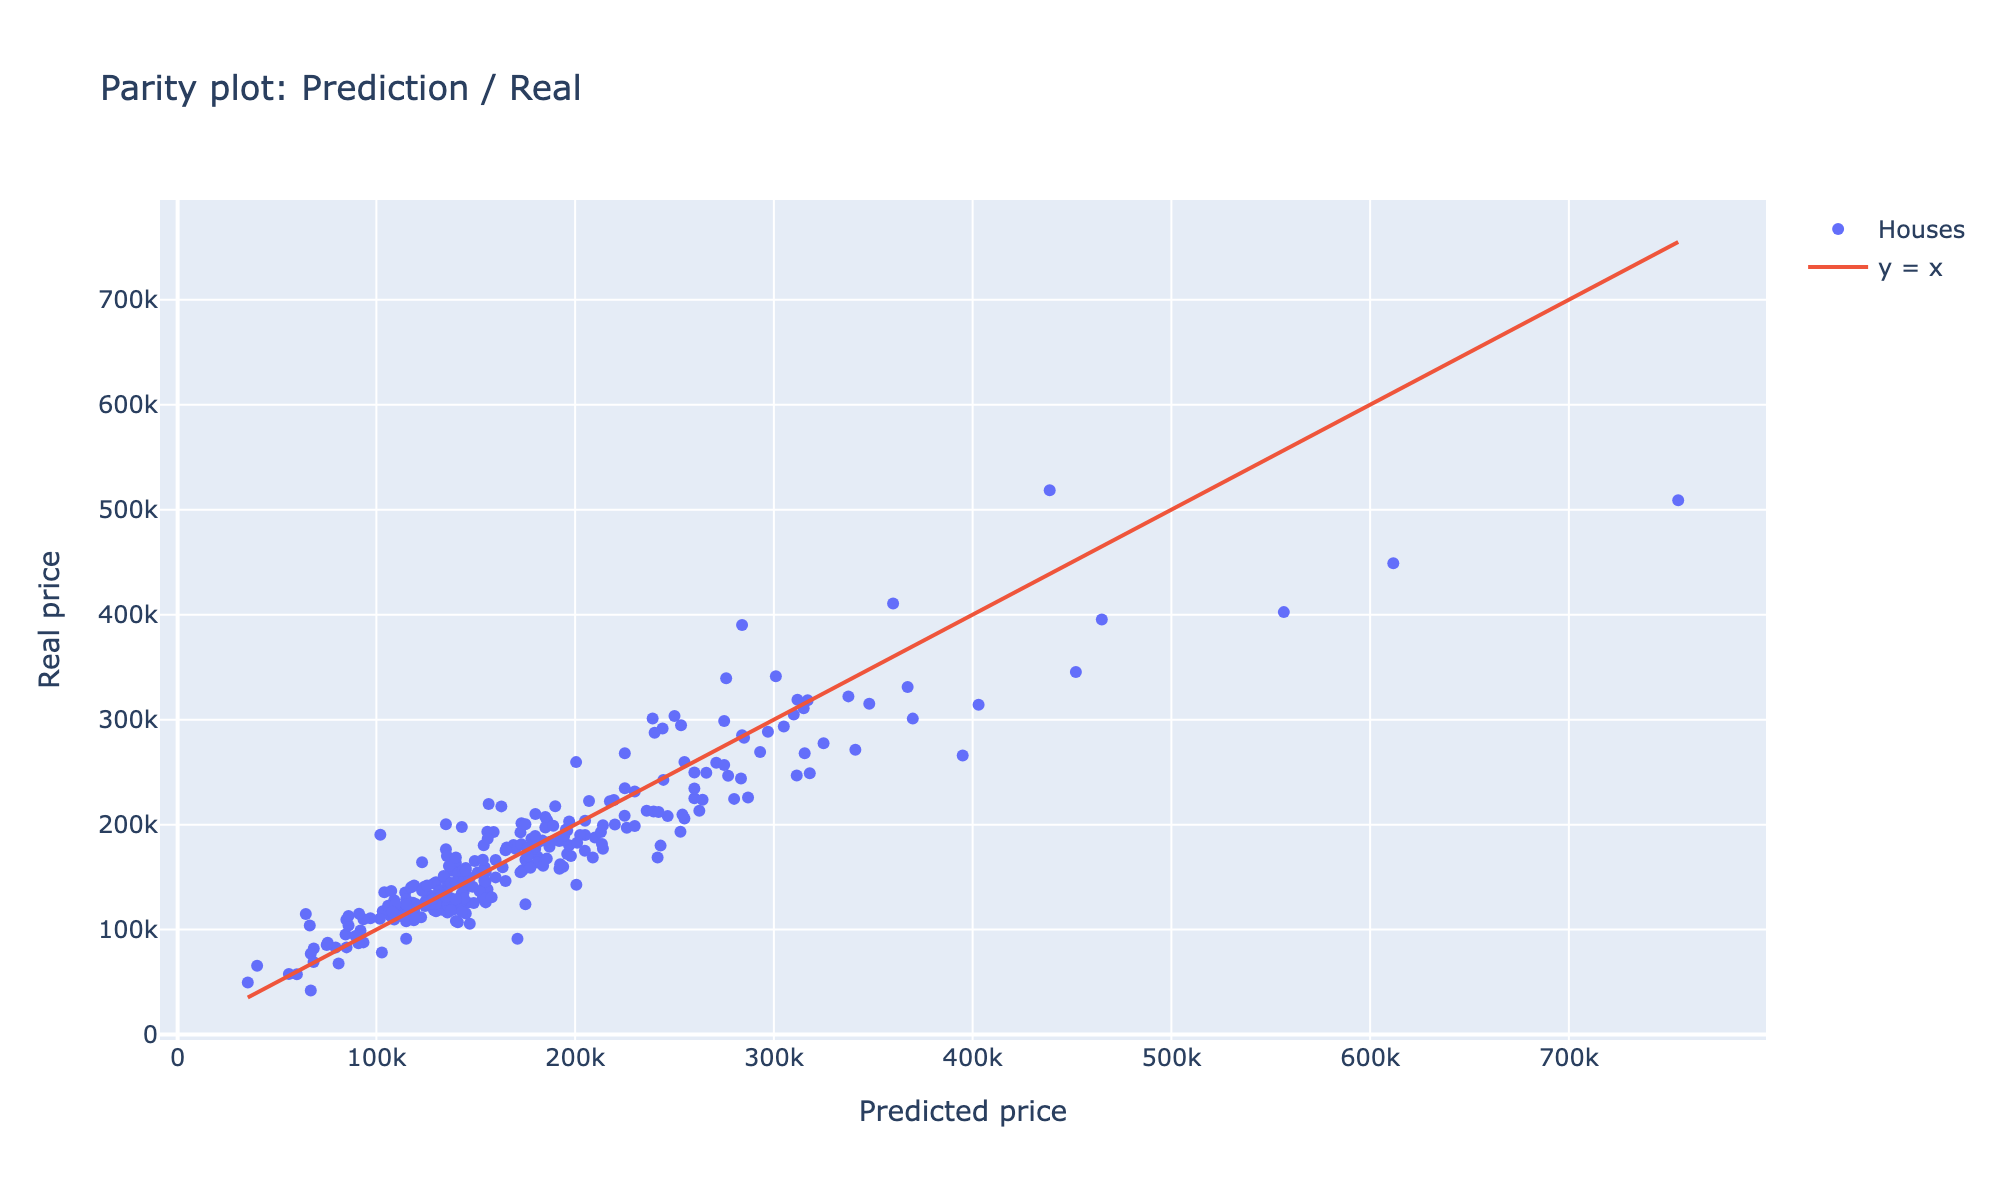

In [197]:
def inv_if_log(y):
    y = np.asarray(y).reshape(-1)
    return np.expm1(y) if np.nanmax(y) < 20 else y

X_val_hood_i32 = X_val_hood.astype('int32')

y_pred_log = model.predict({'main': X_val_main, 'hood': X_val_hood_i32}, batch_size=256, verbose=0).ravel()
y_true = inv_if_log(y_val)
y_pred = inv_if_log(y_pred_log)

df = pd.DataFrame({
    "i": np.arange(len(y_true)),
    "y_true": y_true,
    "y_pred": y_pred
})
df["err"] = df["y_pred"] - df["y_true"]
df["abs_err"] = df["err"].abs()
df["pct_err"] = 100 * df["err"] / df["y_true"]

xy_min = float(min(df["y_true"].min(), df["y_pred"].min()))
xy_max = float(max(df["y_true"].max(), df["y_pred"].max()))

fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df["y_true"], y=df["y_pred"], mode="markers", name="Houses",
    customdata=np.c_[df["err"], df["pct_err"]],
))
fig2.add_trace(go.Scatter(
    x=[xy_min, xy_max], y=[xy_min, xy_max], mode="lines", name="y = x"
))
fig2.update_layout(
    title="Parity plot: Prediction / Real",
    xaxis_title="Predicted price",
    yaxis_title="Real price"
)
fig2.show(renderer="png")


In [199]:

# === 1) Собираем test-фичи идентично train-пайплайну ===
import numpy as np
import pandas as pd

# Проверим, что у нас есть подготовленные блоки фичей
assert 'X_test_num' in globals(), "X_test_num не найден — выполните ячейки с числовым препроцессингом"
assert 'X_test_cat' in globals(), "X_test_cat не найден — выполните one-hot кодирование категориальных"
assert 'test_csv' in globals(), "test_csv не найден — загрузите test.csv"

# Neighborhood -> индекс (должен быть уже сделан выше в ноутбуке)
assert 'Neighborhood_idx' in test_csv.columns, "Нет test_csv['Neighborhood_idx'] — выполните ячейку маппинга hood2idx"

X_test_main = np.hstack([X_test_num, X_test_cat])
hood_test = test_csv['Neighborhood_idx'].values.reshape(-1, 1).astype('int32')

X_test_main.shape, hood_test.shape, test_csv.shape

# === 2) Предсказываем на тесте и возвращаемся из log-шкалы ===
def inv_if_log(y):
    import numpy as _np
    y = _np.asarray(y).reshape(-1)
    return _np.expm1(y) if _np.nanmax(y) < 20 else y

# model должен быть обучен выше (на LogSalePrice)
assert 'model' in globals(), "Модель не обучена — выполните блок обучения"
y_test_log = model.predict({'main': X_test_main, 'hood': hood_test}, batch_size=256, verbose=0).ravel()
y_test = inv_if_log(y_test_log)

# Sanity checks
assert np.isfinite(y_test).all(), "В предсказаниях есть NaN/Inf"
assert len(y_test) == len(test_csv), "Длина предсказаний не совпадает с test_csv"

pd.Series(y_test).describe()

# === 3) Формируем submission.csv ===
sub = pd.DataFrame({
    "Id": test_csv["Id"].astype(int),
    "SalePrice": y_test
})
# Формат ровно две колонки, без индекса
assert sub.columns.tolist() == ["Id", "SalePrice"]
assert sub.isna().sum().sum() == 0, "В сабмите есть пропуски"
sub.to_csv("submission.csv", index=False)
print("Saved:", "submission.csv", "shape:", sub.shape)
sub.head()


AssertionError: В предсказаниях есть NaN/Inf